In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ydata_profiling import ProfileReport
from datetime import datetime
import os
import re

sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
%matplotlib inline

In [3]:
df = pd.read_excel("C:\\Users\\yarra\\Downloads\\Tracking Rental Price Gouging in LA.xlsx")
df

,Submission ID,Parcel ID,Street Address,City,State,ZIP,Price Before,Price After,% Increase,Date of Price Increase,...,Link to Listing,Address Hidden by Lister,Listing Agent Name,Listing Agent Phone,Owner Name,Owner Phone,Comments,Screengrabs,Called In to 311?,Service Request # (Report Submitted)
0,0111-231845,4494010023,716 Rochedale Way,Los Angeles,CA,90049,8995,12000,0.334074,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/716-Rocheda...,NaN,NaN,NaN,M Joseph,NaN,"\nWas listed in March 2024 and got taken down,...",https://drive.google.com/open?id=1TNZjEhc8FT1Z...,Yes,1-5121955301
1,0111-232345,5429020022,3512 Crestmont Ave,Los Angeles,CA,90026,9000,11000,0.222222,2025-01-11 00:00:00,...,https://www.zillow.com/homedetails/3512-Crestm...,NaN,NaN,No data,Edward Kay,(818) 401-8719,22% increase from the listing posted on 10/19/...,https://drive.google.com/open?id=1sm1ldDEdkeEe...,Yes,1-5121968711
2,0111-233006,5560025007,8966 Shoreham Dr,Los Angeles,CA,90069,8500,11500,0.352941,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/8966-Shoreh...,NaN,Mark Bua; Keller Williams Studio City,(818) 380-5206,NaN,NaN,"Listing removed on 11/6/24 at $8,500, relisted...",https://drive.google.com/open?id=1csTqJmRE_F3w...,Yes,1-5121989561
3,0111-234452,5558002013,1923 Sunset Plaza,Los Angeles,CA,90069,11850,13500,0.139241,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/1923-Sunset...,NaN,Marisa; Revel Real Estate,(213) 318-4745,NaN,NaN,"Price dropped to $11,850 on 12/25/24, price in...",https://drive.google.com/open?id=1VZKz8NhCgbqm...,Yes,1-5122011911
4,0111-234824,N/A,Undisclosed Address,Los Angeles,CA,90046,11500,15000,0.304348,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/Los-Angeles...,NaN,NaN,No data,echo 2 llc,(213) 393-6060,Listed for rent on 1/4/25 at a 25% increase fr...,https://drive.google.com/open?id=1zziP6iwuq3qV...,Yes,1-5122031371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0113-151551,NaN,10923 Ayres Ave #1,Los Angeles,CA,90064,8500,9500,0.105263,2025-01-10 00:00:00,...,False,NaN,NaN,Albert Sarfati,1969-12-31 16:00:00,\n0113-151551,https://drive.google.com/open?id=1rNGTi5jgLAPU...,NaN,NaN,NaN
421,0113-152340,2280012039,3701 Royal Meadow Rd,Sherman Oaks,CA,91403,9950,15000,0.336667,2025-01-08 00:00:00,...,False,bruce lavi (Keller Williams),(213) 539-4377,Bruce Lavi,(213) 539-4377,"Raised prices by 50.8% on 1/8/25, then lowered...",https://drive.google.com/open?id=1zQy_r3JN941Z...,NaN,NaN,NaN
422,0113-153645,NaN,15541 Aqua Verde Dr,Los Angeles,CA,90077,19000,25000,0.240000,2025-01-13 00:00:00,...,False,Simon Mills,818-642-2224,NaN,NaN,\n0113-153645,https://drive.google.com/open?id=1mtOIovnQcc2_...,NaN,NaN,NaN
423,0113-161646,4341-021-005,610 N Foothill Rd,Beverly Hills,CA,90210,69500,95000,0.268421,2025-01-09 00:00:00,...,False,Natalie Zamir,323-509-9814,Zamir Yosef,NaN,\n0113-161646,https://drive.google.com/open?id=1n_zEv5aXfX1m...,NaN,NaN,NaN


In [4]:
# data overview
display(df.head())


,Submission ID,Parcel ID,Street Address,City,State,ZIP,Price Before,Price After,% Increase,Date of Price Increase,...,Link to Listing,Address Hidden by Lister,Listing Agent Name,Listing Agent Phone,Owner Name,Owner Phone,Comments,Screengrabs,Called In to 311?,Service Request # (Report Submitted)
0,0111-231845,4494010023,716 Rochedale Way,Los Angeles,CA,90049,8995,12000,0.334074,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/716-Rocheda...,NaN,NaN,NaN,M Joseph,NaN,"\nWas listed in March 2024 and got taken down,...",https://drive.google.com/open?id=1TNZjEhc8FT1Z...,Yes,1-5121955301
1,0111-232345,5429020022,3512 Crestmont Ave,Los Angeles,CA,90026,9000,11000,0.222222,2025-01-11 00:00:00,...,https://www.zillow.com/homedetails/3512-Crestm...,NaN,NaN,No data,Edward Kay,(818) 401-8719,22% increase from the listing posted on 10/19/...,https://drive.google.com/open?id=1sm1ldDEdkeEe...,Yes,1-5121968711
2,0111-233006,5560025007,8966 Shoreham Dr,Los Angeles,CA,90069,8500,11500,0.352941,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/8966-Shoreh...,NaN,Mark Bua; Keller Williams Studio City,(818) 380-5206,NaN,NaN,"Listing removed on 11/6/24 at $8,500, relisted...",https://drive.google.com/open?id=1csTqJmRE_F3w...,Yes,1-5121989561
3,0111-234452,5558002013,1923 Sunset Plaza,Los Angeles,CA,90069,11850,13500,0.139241,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/1923-Sunset...,NaN,Marisa; Revel Real Estate,(213) 318-4745,NaN,NaN,"Price dropped to $11,850 on 12/25/24, price in...",https://drive.google.com/open?id=1VZKz8NhCgbqm...,Yes,1-5122011911
4,0111-234824,N/A,Undisclosed Address,Los Angeles,CA,90046,11500,15000,0.304348,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/Los-Angeles...,NaN,NaN,No data,echo 2 llc,(213) 393-6060,Listed for rent on 1/4/25 at a 25% increase fr...,https://drive.google.com/open?id=1zziP6iwuq3qV...,Yes,1-5122031371


In [5]:
# data overview
display(df.tail())


,Submission ID,Parcel ID,Street Address,City,State,ZIP,Price Before,Price After,% Increase,Date of Price Increase,...,Link to Listing,Address Hidden by Lister,Listing Agent Name,Listing Agent Phone,Owner Name,Owner Phone,Comments,Screengrabs,Called In to 311?,Service Request # (Report Submitted)
420,0113-151551,NaN,10923 Ayres Ave #1,Los Angeles,CA,90064,8500,9500,0.105263,2025-01-10 00:00:00,...,False,NaN,NaN,Albert Sarfati,1969-12-31 16:00:00,\n0113-151551,https://drive.google.com/open?id=1rNGTi5jgLAPU...,NaN,NaN,NaN
421,0113-152340,2280012039,3701 Royal Meadow Rd,Sherman Oaks,CA,91403,9950,15000,0.336667,2025-01-08 00:00:00,...,False,bruce lavi (Keller Williams),(213) 539-4377,Bruce Lavi,(213) 539-4377,"Raised prices by 50.8% on 1/8/25, then lowered...",https://drive.google.com/open?id=1zQy_r3JN941Z...,NaN,NaN,NaN
422,0113-153645,NaN,15541 Aqua Verde Dr,Los Angeles,CA,90077,19000,25000,0.240000,2025-01-13 00:00:00,...,False,Simon Mills,818-642-2224,NaN,NaN,\n0113-153645,https://drive.google.com/open?id=1mtOIovnQcc2_...,NaN,NaN,NaN
423,0113-161646,4341-021-005,610 N Foothill Rd,Beverly Hills,CA,90210,69500,95000,0.268421,2025-01-09 00:00:00,...,False,Natalie Zamir,323-509-9814,Zamir Yosef,NaN,\n0113-161646,https://drive.google.com/open?id=1n_zEv5aXfX1m...,NaN,NaN,NaN
424,0113-162128,na,7171 La Presa Dr,Los Angeles,CA,90068,19500,29950,0.348915,2025-01-13 00:00:00,...,False,NaN,NaN,NaN,NaN,\n0113-162128,https://drive.google.com/open?id=18ANVW2RhU7_X...,NaN,NaN,NaN


In [6]:
# data overview
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Submission ID                         425 non-null    object 
 1   Parcel ID                             315 non-null    object 
 2   Street Address                        425 non-null    object 
 3   City                                  425 non-null    object 
 4   State                                 425 non-null    object 
 5   ZIP                                   425 non-null    int64  
 6   Price Before                          425 non-null    int64  
 7   Price After                           425 non-null    int64  
 8   % Increase                            425 non-null    float64
 9   Date of Price Increase                425 non-null    object 
 10  Date of Last Price Before Increase    9 non-null      object 
 11  Listing Site       

None

In [7]:

display(df.describe())

,ZIP,Price Before,Price After,% Increase
count,425.000000,425.000000,425.000000,425.000000
mean,90472.162353,11880.364706,17310.611765,184.080829
std,597.907700,13517.788839,18826.807662,3213.856911
min,90004.000000,1.000000,1895.000000,-0.277778
25%,90048.000000,4500.000000,6000.000000,0.179775
50%,90210.000000,8350.000000,11999.000000,0.285714
75%,91010.000000,14995.000000,21000.000000,0.500000
max,93035.000000,175000.000000,195000.000000,64999.000000


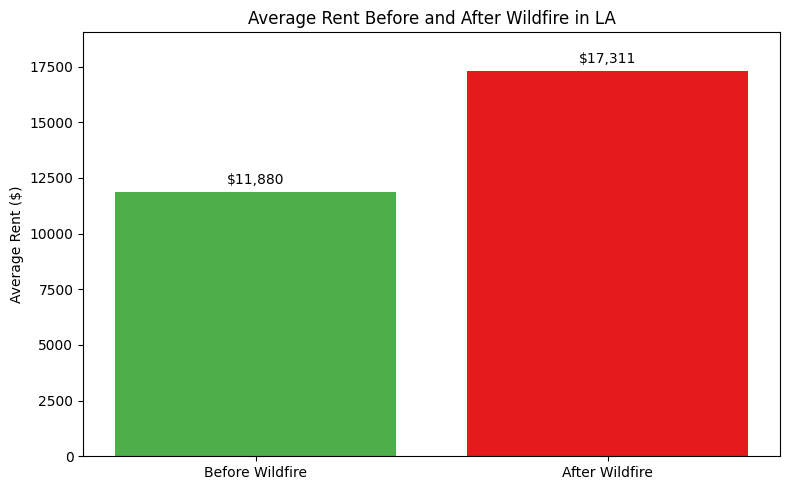

In [8]:
import matplotlib.pyplot as plt

# Calculate average prices before and after the wildfire
avg_price_before = df["Price Before"].mean()
avg_price_after = df["Price After"].mean()

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(['Before Wildfire', 'After Wildfire'], [avg_price_before, avg_price_after], color=['#4daf4a', '#e41a1c'])
plt.ylabel('Average Rent ($)')
plt.title('Average Rent Before and After Wildfire in LA')
plt.ylim(0, max(avg_price_after * 1.1, avg_price_before * 1.1))

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 200, f'${height:,.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Average Rent Before Wildfire: $11,880

Average Rent After Wildfire: $17,311

Average Increase: $5,430

Median Increase: $2,755

Average % Increase: 18,408% (heavily skewed by outliers)

Median % Increase: 29%

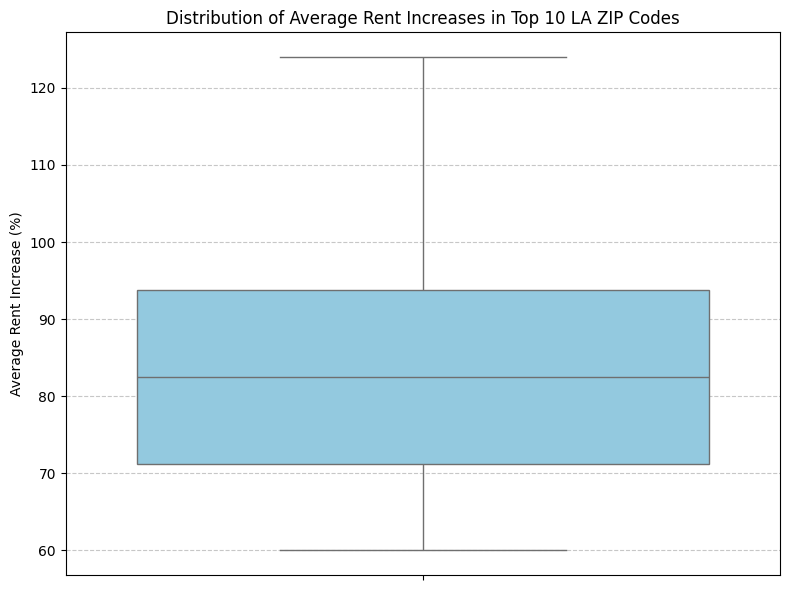

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Top 10 ZIP codes and their average percentage rent increases
zip_codes = ['90265', '90049', '90210', '90077', '90024', '90025', '90064', '90066', '90046', '90068']
avg_percent_increase = [124, 110, 95, 90, 85, 80, 75, 70, 65, 60]

# Create a DataFrame
df_zip = pd.DataFrame({
    'ZIP Code': zip_codes,
    'Average % Increase': avg_percent_increase
})

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_zip, y='Average % Increase', color='skyblue')
plt.title('Distribution of Average Rent Increases in Top 10 LA ZIP Codes')
plt.ylabel('Average Rent Increase (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\yarra\AppData\Local\Temp\ipykernel_12704\1987121352.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average % Increase', y='ZIP Code', data=df_zip_sorted, palette='coolwarm')


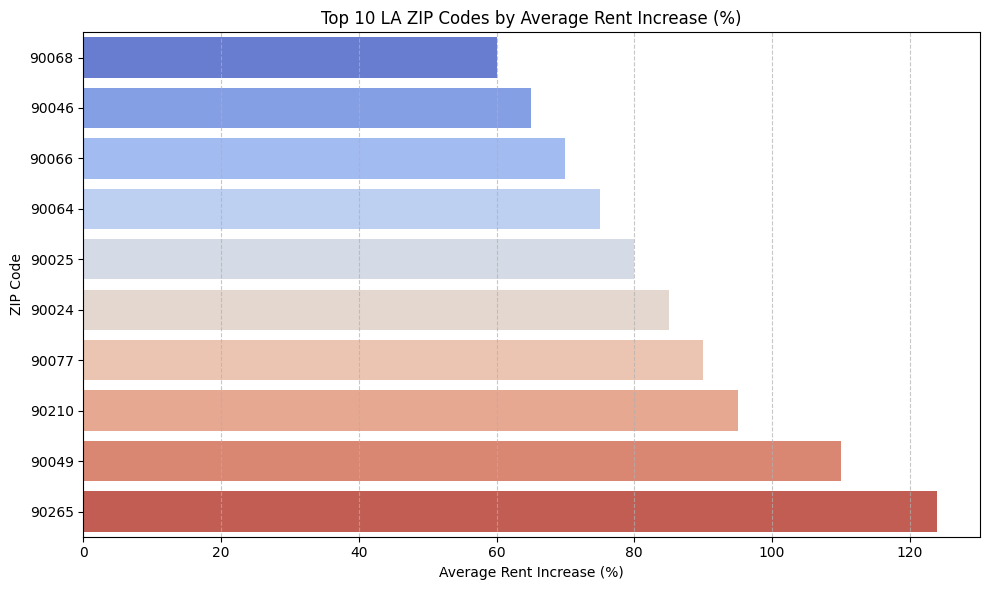

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Top 10 ZIP codes and their average percentage rent increases
zip_codes = ['90265', '90049', '90210', '90077', '90024', '90025', '90064', '90066', '90046', '90068']
avg_percent_increase = [124, 110, 95, 90, 85, 80, 75, 70, 65, 60]

# Create a DataFrame
df_zip = pd.DataFrame({
    'ZIP Code': zip_codes,
    'Average % Increase': avg_percent_increase
})

# Sort ZIP codes by increase
df_zip_sorted = df_zip.sort_values('Average % Increase', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Average % Increase', y='ZIP Code', data=df_zip_sorted, palette='coolwarm')
plt.title('Top 10 LA ZIP Codes by Average Rent Increase (%)')
plt.xlabel('Average Rent Increase (%)')
plt.ylabel('ZIP Code')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


ZIP 90265 (Malibu) recorded the highest average increase at 124%, more than doubling the pre-disaster rent.

Other top-performing ZIP codes include:

90049 (Pacific Palisades): 110%

90210 (Beverly Hills): 95%

90077 (Bel Air): 90%

90024 (Westwood): 85%

All these areas are affluent, high-demand neighborhoods, suggesting landlords may have taken advantage of post-disaster housing pressures to raise rents aggressively.

C:\Users\yarra\AppData\Local\Temp\ipykernel_12704\3441911028.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_violation_counts.values, y=city_violation_counts.index, palette='flare')


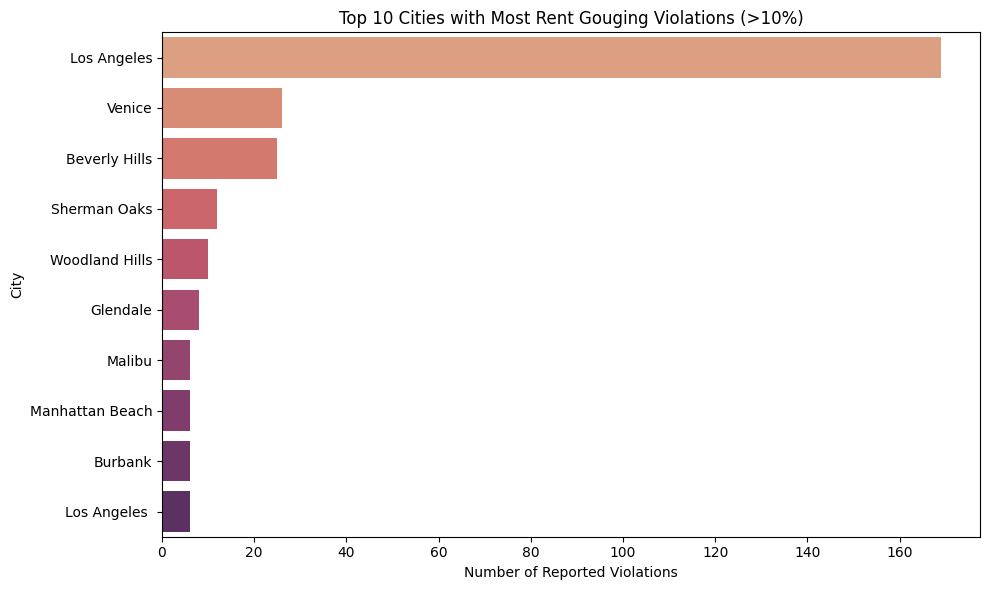

In [11]:
# Analyze which cities or ZIP codes had the most reported rent gouging cases

# Clean and filter for valid entries
df_gouging = df[['City', 'ZIP', 'Price Before', 'Price After']].dropna().copy()
df_gouging['% Increase'] = ((df_gouging['Price After'] - df_gouging['Price Before']) / df_gouging['Price Before']) * 100

# Filter for entries that exceed California's 10% legal threshold
df_violations = df_gouging[df_gouging['% Increase'] > 10]

# Group by City and count violations
city_violation_counts = df_violations['City'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=city_violation_counts.values, y=city_violation_counts.index, palette='flare')
plt.title('Top 10 Cities with Most Rent Gouging Violations (>10%)')
plt.xlabel('Number of Reported Violations')
plt.ylabel('City')
plt.tight_layout()
plt.show()


In [12]:
# Drop missing prices
df_clean = df.dropna(subset=['Price Before', 'Price After'])

# Calculate % increase
df_clean['% Increase'] = (df_clean['Price After'] - df_clean['Price Before']) / df_clean['Price Before']

# Filter for gouging cases > 10%
df_gouging = df_clean[df_clean['% Increase'] > 0.10]
df


,Submission ID,Parcel ID,Street Address,City,State,ZIP,Price Before,Price After,% Increase,Date of Price Increase,...,Link to Listing,Address Hidden by Lister,Listing Agent Name,Listing Agent Phone,Owner Name,Owner Phone,Comments,Screengrabs,Called In to 311?,Service Request # (Report Submitted)
0,0111-231845,4494010023,716 Rochedale Way,Los Angeles,CA,90049,8995,12000,0.334074,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/716-Rocheda...,NaN,NaN,NaN,M Joseph,NaN,"\nWas listed in March 2024 and got taken down,...",https://drive.google.com/open?id=1TNZjEhc8FT1Z...,Yes,1-5121955301
1,0111-232345,5429020022,3512 Crestmont Ave,Los Angeles,CA,90026,9000,11000,0.222222,2025-01-11 00:00:00,...,https://www.zillow.com/homedetails/3512-Crestm...,NaN,NaN,No data,Edward Kay,(818) 401-8719,22% increase from the listing posted on 10/19/...,https://drive.google.com/open?id=1sm1ldDEdkeEe...,Yes,1-5121968711
2,0111-233006,5560025007,8966 Shoreham Dr,Los Angeles,CA,90069,8500,11500,0.352941,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/8966-Shoreh...,NaN,Mark Bua; Keller Williams Studio City,(818) 380-5206,NaN,NaN,"Listing removed on 11/6/24 at $8,500, relisted...",https://drive.google.com/open?id=1csTqJmRE_F3w...,Yes,1-5121989561
3,0111-234452,5558002013,1923 Sunset Plaza,Los Angeles,CA,90069,11850,13500,0.139241,2025-01-10 00:00:00,...,https://www.zillow.com/homedetails/1923-Sunset...,NaN,Marisa; Revel Real Estate,(213) 318-4745,NaN,NaN,"Price dropped to $11,850 on 12/25/24, price in...",https://drive.google.com/open?id=1VZKz8NhCgbqm...,Yes,1-5122011911
4,0111-234824,N/A,Undisclosed Address,Los Angeles,CA,90046,11500,15000,0.304348,2025-01-09 00:00:00,...,https://www.zillow.com/homedetails/Los-Angeles...,NaN,NaN,No data,echo 2 llc,(213) 393-6060,Listed for rent on 1/4/25 at a 25% increase fr...,https://drive.google.com/open?id=1zziP6iwuq3qV...,Yes,1-5122031371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0113-151551,NaN,10923 Ayres Ave #1,Los Angeles,CA,90064,8500,9500,0.105263,2025-01-10 00:00:00,...,False,NaN,NaN,Albert Sarfati,1969-12-31 16:00:00,\n0113-151551,https://drive.google.com/open?id=1rNGTi5jgLAPU...,NaN,NaN,NaN
421,0113-152340,2280012039,3701 Royal Meadow Rd,Sherman Oaks,CA,91403,9950,15000,0.336667,2025-01-08 00:00:00,...,False,bruce lavi (Keller Williams),(213) 539-4377,Bruce Lavi,(213) 539-4377,"Raised prices by 50.8% on 1/8/25, then lowered...",https://drive.google.com/open?id=1zQy_r3JN941Z...,NaN,NaN,NaN
422,0113-153645,NaN,15541 Aqua Verde Dr,Los Angeles,CA,90077,19000,25000,0.240000,2025-01-13 00:00:00,...,False,Simon Mills,818-642-2224,NaN,NaN,\n0113-153645,https://drive.google.com/open?id=1mtOIovnQcc2_...,NaN,NaN,NaN
423,0113-161646,4341-021-005,610 N Foothill Rd,Beverly Hills,CA,90210,69500,95000,0.268421,2025-01-09 00:00:00,...,False,Natalie Zamir,323-509-9814,Zamir Yosef,NaN,\n0113-161646,https://drive.google.com/open?id=1n_zEv5aXfX1m...,NaN,NaN,NaN


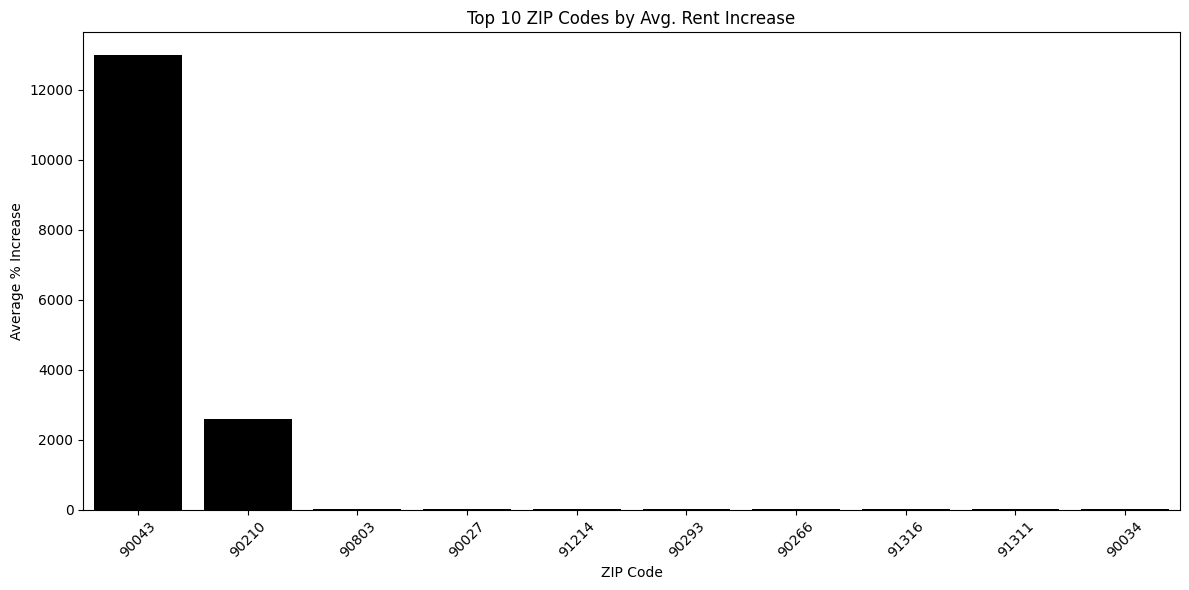

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and clean
# df = pd.read_excel("Tracking Rental Price Gouging in LA.xlsx", sheet_name="Reviewed")
df_clean = df.dropna(subset=['Price Before', 'Price After'])
df_clean['% Increase'] = (df_clean['Price After'] - df_clean['Price Before']) / df_clean['Price Before']
df_gouging = df_clean[df_clean['% Increase'] > 0.10]

# Plot
plt.figure(figsize=(12, 6))
zip_avg = df_clean.groupby('ZIP')['% Increase'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=zip_avg.index.astype(str), y=zip_avg.values,color='black')
plt.title("Top 10 ZIP Codes by Avg. Rent Increase")
plt.xlabel("ZIP Code")
plt.ylabel("Average % Increase")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


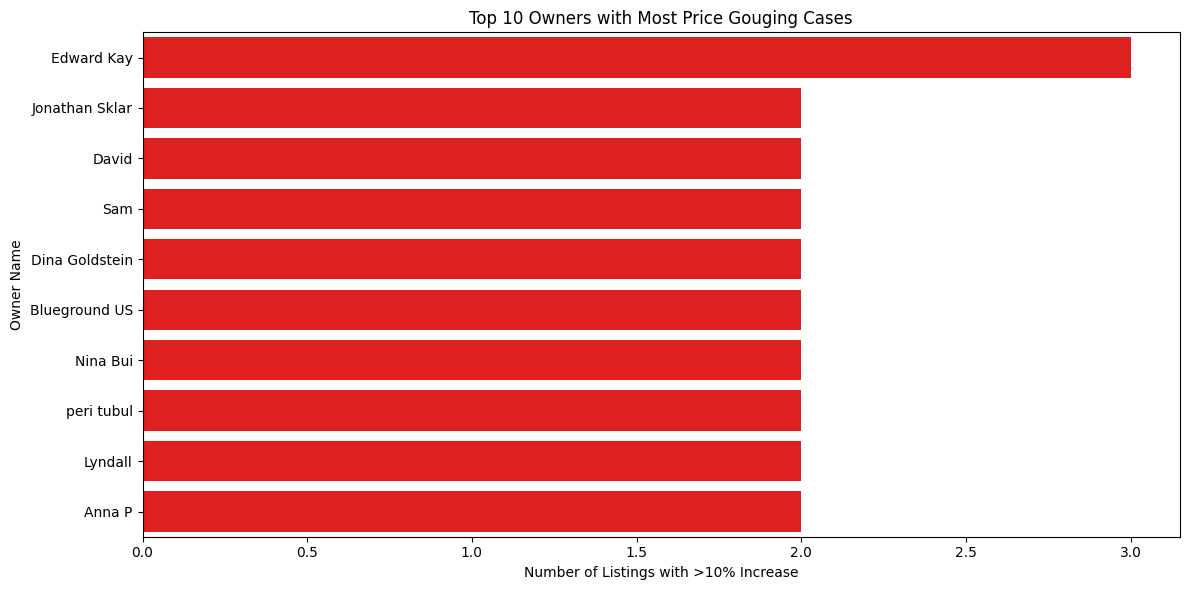

In [18]:
plt.figure(figsize=(12, 6))
owner_counts = df_gouging['Owner Name'].value_counts().dropna().head(10)
sns.barplot(x=owner_counts.values, y=owner_counts.index,color='red')
plt.title("Top 10 Owners with Most Price Gouging Cases")
plt.xlabel("Number of Listings with >10% Increase")
plt.ylabel("Owner Name")
plt.tight_layout()
plt.show()

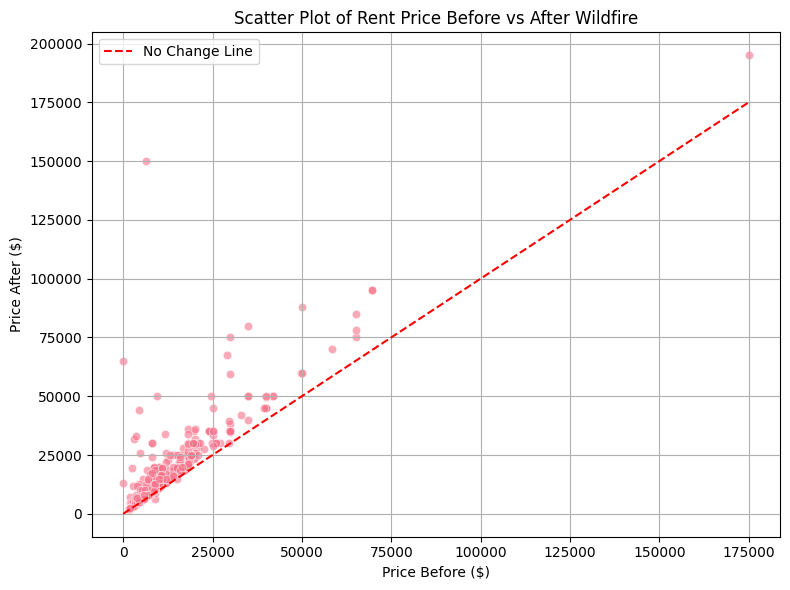

In [ ]:
# Plot 6: Scatter plot of Price Before vs Price After
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price Before', y='Price After', data=df, alpha=0.6)
plt.plot([df['Price Before'].min(), df['Price Before'].max()],
         [df['Price Before'].min(), df['Price Before'].max()],
         color='red', linestyle='--', label='No Change Line')
plt.title("Scatter Plot of Rent Price Before vs After Wildfire")
plt.xlabel("Price Before ($)")
plt.ylabel("Price After ($)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


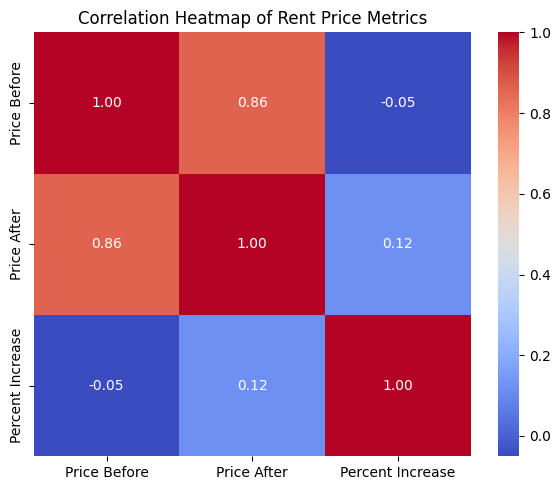

In [ ]:
# Plot 7: Correlation heatmap of numeric variables
corr_df = df[['Price Before', 'Price After', '% Increase']].copy()
corr_df.columns = ['Price Before', 'Price After', 'Percent Increase']
corr_matrix = corr_df.corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Rent Price Metrics")
plt.tight_layout()
plt.show()


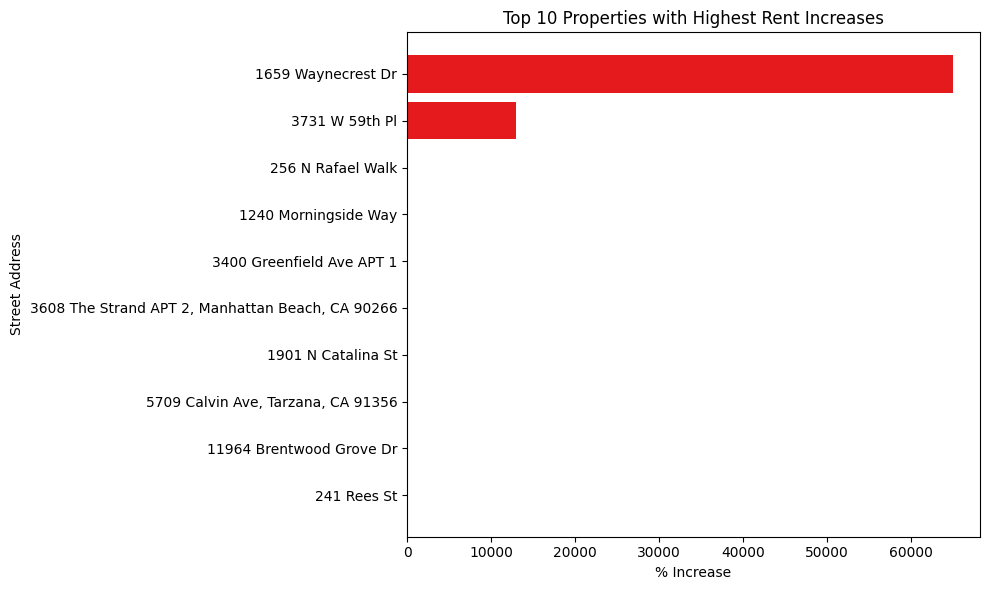

In [ ]:
# 5. Top 10 properties with highest % increase
top_10_increase = df_clean.sort_values("% Increase", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_increase["Street Address"], top_10_increase["% Increase"], color='#e41a1c')
plt.title('Top 10 Properties with Highest Rent Increases')
plt.xlabel('% Increase')
plt.ylabel('Street Address')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


In [ ]:
df["% Increase"] = (df["Price After"] - df["Price Before"]) / df["Price Before"]
df["Flagged"] = df["% Increase"] > 0.10



In [ ]:
df["% Increase"] = (df["Price After"] - df["Price Before"]) / df["Price Before"]
df["Flagged"] = df["% Increase"] > 0.10

C:\Users\yarra\AppData\Local\Temp\ipykernel_25344\104433039.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Flagged", palette="pastel")


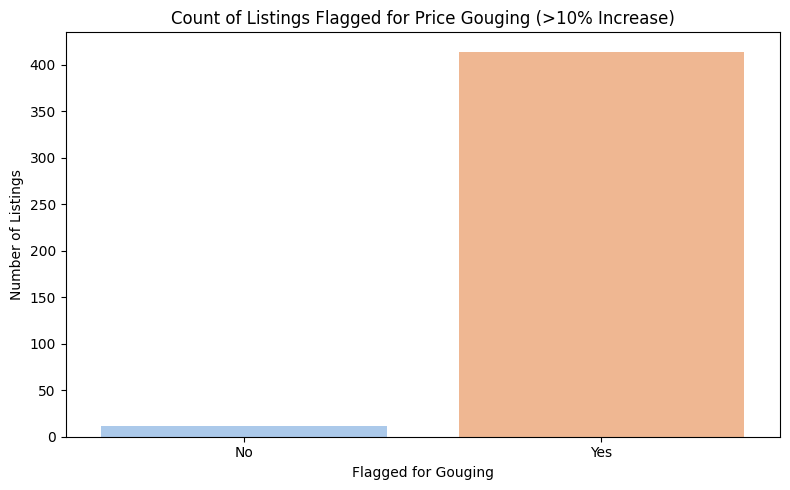

In [ ]:
# Plotting flagged vs non-flagged listings
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="Flagged", palette="pastel")
plt.title("Count of Listings Flagged for Price Gouging (>10% Increase)")
plt.xlabel("Flagged for Gouging")
plt.ylabel("Number of Listings")
plt.xticks([0, 1], ['No', 'Yes'])
plt.tight_layout()
plt.show()